In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('breast_cancer_survival.csv')

In [3]:
df.head(2)

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.1500,0.007972,-0.04834,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.3802,-0.498030,-0.50732,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead


In [4]:
df.shape

(334, 15)

In [5]:
df.isna().sum()

Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

In [6]:
df.dropna(how='any',inplace=True)

In [7]:
df.drop_duplicates()
df.head(2)

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.1500,0.007972,-0.04834,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.3802,-0.498030,-0.50732,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead


In [8]:
df['Gender']=df['Gender'].str.replace('FEMALE','1')
df['Gender']=df['Gender'].str.replace('MALE','0')
df['ER status']=df['ER status'].str.replace('Positive','0')
df['ER status']=df['ER status'].str.replace('Negative','1')
df['PR status']=df['PR status'].str.replace('Positive','0')
df['PR status']=df['PR status'].str.replace('Negative','1')
df['HER2 status']=df['HER2 status'].str.replace('Positive','0')
df['HER2 status']=df['HER2 status'].str.replace('Negative','1')
df['Patient_Status']=df['Patient_Status'].str.replace('Alive','0')
df['Patient_Status']=df['Patient_Status'].str.replace('Dead','1')



In [9]:
df.head(2)

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,1,0.95256,2.1500,0.007972,-0.04834,II,Infiltrating Ductal Carcinoma,0,0,1,Other,20-May-18,26-Aug-18,0
1,54,1,0.00000,1.3802,-0.498030,-0.50732,II,Infiltrating Ductal Carcinoma,0,0,1,Other,26-Apr-18,25-Jan-19,1


In [10]:
df['Gender']=df['Gender'].astype(float)
df['ER status']=df['ER status'].astype(float)
df['PR status']=df['PR status'].astype(float)
df['HER2 status']=df['HER2 status'].astype(float)
df['Patient_Status']=df['Patient_Status'].astype(float)

In [11]:
df['ER status'].value_counts()

ER status
0.0    317
Name: count, dtype: int64

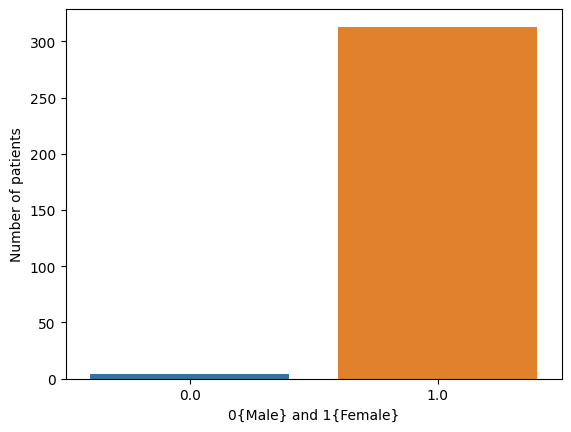

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.countplot(x='Gender',data=df)
plt.xlabel('0{Male} and 1{Female}')
plt.ylabel('Number of patients')
plt.show()

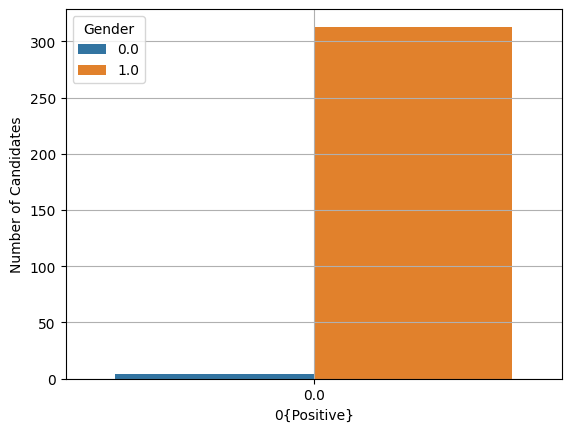

In [13]:
sns.countplot(x='ER status',data=df,hue='Gender')
plt.style.use('fivethirtyeight')
plt.xlabel('0{Positive}')
plt.ylabel('Number of Candidates')
plt.grid(True)


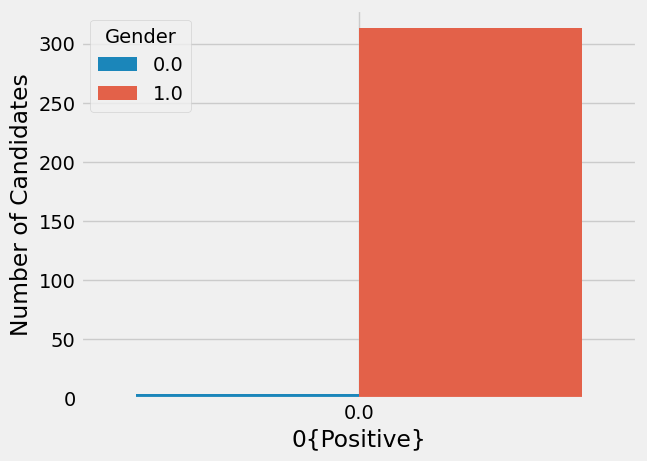

In [14]:
sns.countplot(x='PR status',data=df,hue='Gender')
plt.style.use('fivethirtyeight')
plt.xlabel('0{Positive}')
plt.ylabel('Number of Candidates')
plt.grid(True)

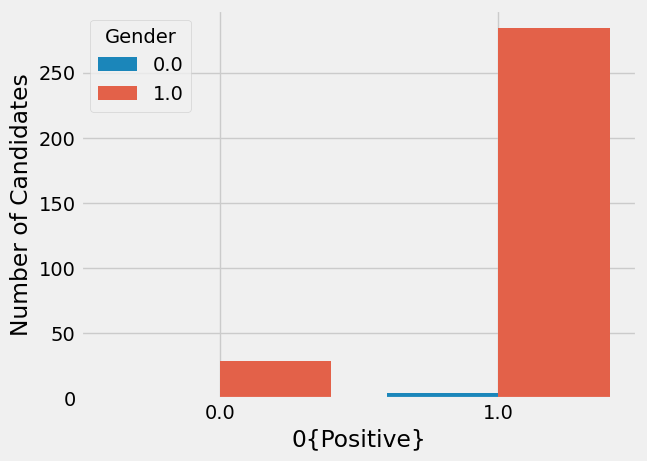

In [15]:
sns.countplot(x='HER2 status',data=df,hue='Gender')
plt.style.use('fivethirtyeight')
plt.xlabel('0{Positive}')
plt.ylabel('Number of Candidates')
plt.grid(True)

In [16]:
df['Tumour_Stage'].value_counts()

Tumour_Stage
II     180
III     77
I       60
Name: count, dtype: int64

<Axes: xlabel='Tumour_Stage', ylabel='count'>

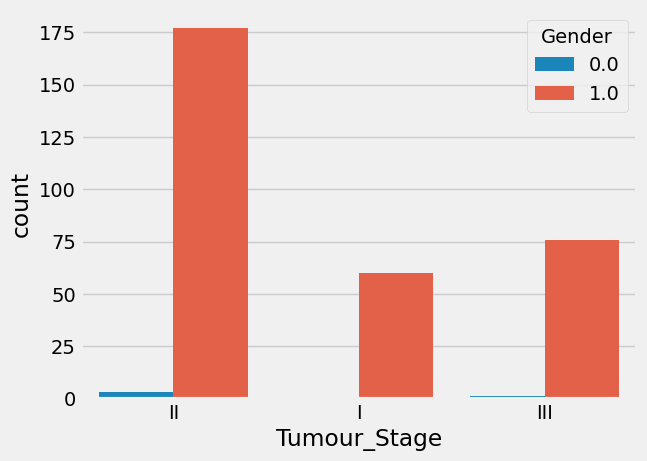

In [17]:
sns.countplot(x='Tumour_Stage',data=df,hue='Gender')

In [18]:
Tumer=df.groupby(['Tumour_Stage'])
Tumer['Patient_Status'].value_counts()

Tumour_Stage  Patient_Status
I             0.0                51
              1.0                 9
II            0.0               144
              1.0                36
III           0.0                60
              1.0                17
Name: count, dtype: int64

<Axes: xlabel='Patient_Status', ylabel='count'>

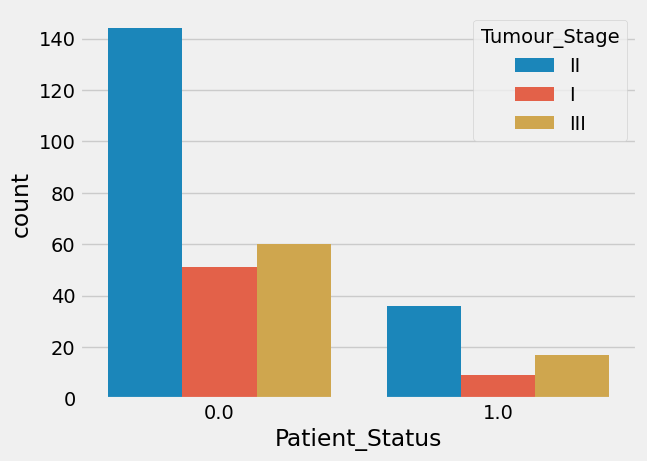

In [19]:
sns.countplot(x='Patient_Status',data=df,hue='Tumour_Stage')

In [20]:
df.head(2)

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,1.0,0.95256,2.1500,0.007972,-0.04834,II,Infiltrating Ductal Carcinoma,0.0,0.0,1.0,Other,20-May-18,26-Aug-18,0.0
1,54,1.0,0.00000,1.3802,-0.498030,-0.50732,II,Infiltrating Ductal Carcinoma,0.0,0.0,1.0,Other,26-Apr-18,25-Jan-19,1.0


In [21]:
df['Date_of_Surgery']=pd.to_datetime(df['Date_of_Surgery'],format='%d-%b-%y')

In [22]:
Date=df.groupby(['Date_of_Surgery'])

In [23]:
Date['Date_of_Surgery'].value_counts()

Date_of_Surgery
2017-01-15    1
2017-01-25    1
2017-02-04    1
2017-02-14    1
2017-02-24    1
             ..
2019-10-12    3
2019-10-22    3
2019-11-01    3
2019-11-11    3
2019-11-21    1
Name: count, Length: 178, dtype: int64

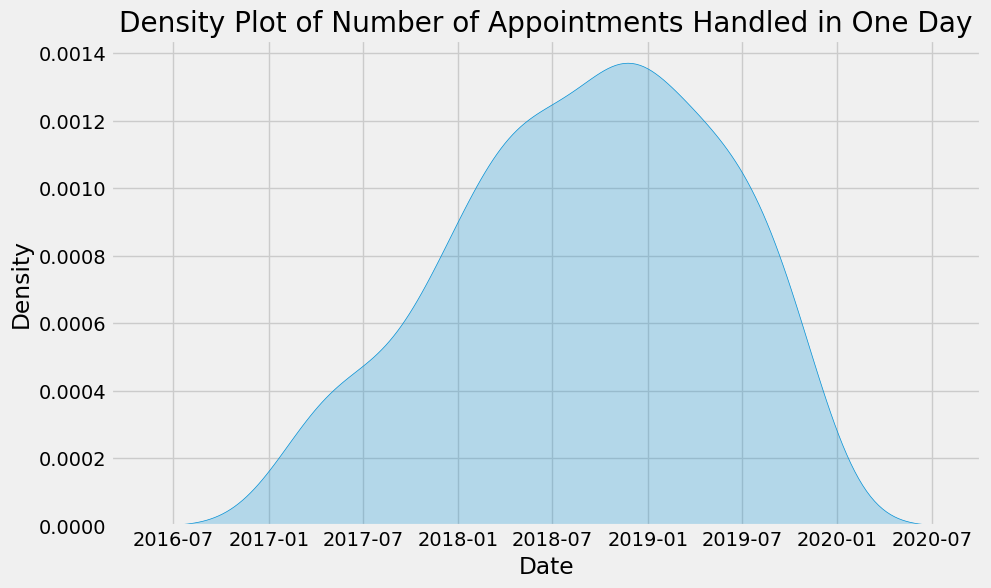

In [24]:
df['Date'] = pd.to_datetime(df['Date_of_Surgery'])

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a density plot using seaborn
sns.kdeplot(data=df, x='Date', fill=True)

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('Density')
plt.title('Density Plot of Number of Appointments Handled in One Day')

# Display the plot
plt.show()

In [25]:
df[['Protein1','Protein2','Protein3']].describe()

,Protein1,Protein2,Protein3
count,317.000000,317.000000,317.000000
mean,-0.027232,0.949557,-0.095104
std,0.543858,0.906153,0.589027
min,-2.144600,-0.978730,-1.627400
25%,-0.350600,0.368840,-0.531360
50%,0.005649,0.997130,-0.193040
75%,0.336260,1.612000,0.251210
max,1.593600,3.402200,2.193400


In [26]:
df.head(2)

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Date
0,42,1.0,0.95256,2.1500,0.007972,-0.04834,II,Infiltrating Ductal Carcinoma,0.0,0.0,1.0,Other,2018-05-20,26-Aug-18,0.0,2018-05-20
1,54,1.0,0.00000,1.3802,-0.498030,-0.50732,II,Infiltrating Ductal Carcinoma,0.0,0.0,1.0,Other,2018-04-26,25-Jan-19,1.0,2018-04-26


In [27]:
df.head(2)

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Date
0,42,1.0,0.95256,2.1500,0.007972,-0.04834,II,Infiltrating Ductal Carcinoma,0.0,0.0,1.0,Other,2018-05-20,26-Aug-18,0.0,2018-05-20
1,54,1.0,0.00000,1.3802,-0.498030,-0.50732,II,Infiltrating Ductal Carcinoma,0.0,0.0,1.0,Other,2018-04-26,25-Jan-19,1.0,2018-04-26


# Predicting that Patient is alive or not


In [28]:
from sklearn.preprocessing import LabelEncoder
L=LabelEncoder()
df['Tumour_Stage']=L.fit_transform(df['Tumour_Stage'])
df['Histology']=L.fit_transform(df['Histology'])
df['Surgery_type']=L.fit_transform(df['Surgery_type'])


In [29]:
fd=df[['Gender','ER status','PR status','Protein1','Protein2','Protein3','HER2 status','Histology','Tumour_Stage','Surgery_type','Patient_Status']]
x=fd.iloc[:,:-1]
y=fd.iloc[:,-1]

In [30]:
y

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
329    0.0
330    0.0
331    1.0
332    0.0
333    1.0
Name: Patient_Status, Length: 317, dtype: float64

In [31]:
from sklearn.preprocessing import LabelEncoder
L=LabelEncoder()
L.fit_transform(y)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=10)
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [34]:
y_pred=classifier.predict(x_test)

In [35]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(y_test,y_pred)



0.765625

In [36]:
fd['HER2 status'].value_counts()

HER2 status
1.0    288
0.0     29
Name: count, dtype: int64

In [37]:
fd=df[['Gender','ER status','PR status','Protein1','Protein2','Protein3','HER2 status','Histology','Tumour_Stage','Surgery_type','Patient_Status']]
x=fd.iloc[:,:-1]

y=fd.iloc[:,-1]

In [38]:
from sklearn.preprocessing import LabelEncoder
L=LabelEncoder()
L.fit_transform(y)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [40]:
from sklearn.linear_model import LogisticRegression 
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [41]:
y_pred_2=classifier.predict(x_test)

In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(y_test,y_pred_2)

0.796875

In [43]:
fd=df[['Gender','ER status','PR status','Protein1','Protein2','Protein3','HER2 status','Histology','Tumour_Stage','Surgery_type','Patient_Status']]
x=fd.iloc[:,:-1]
y=fd.iloc[:,-1]

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [45]:
from sklearn.ensemble import RandomForestClassifier
classifier_1=RandomForestClassifier(n_estimators=30)
classifier_1.fit(x_train,y_train)

RandomForestClassifier(n_estimators=30)

In [46]:
y_pred_3=classifier_1.predict(x_test)

In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(y_test,y_pred_3)

0.796875

In [48]:
fd=df[['Gender','ER status','PR status','Protein1','Protein2','Protein3','HER2 status','Histology','Tumour_Stage','Surgery_type','Patient_Status']]
x=fd.iloc[:,:-1]

y=fd.iloc[:,-1]

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [50]:
from sklearn.svm import SVC
classifier_2=SVC(kernel='rbf',random_state=0)
classifier_2.fit(x_train,y_train)

SVC(random_state=0)

In [51]:
y_pred_4=classifier_2.predict(x_test)

In [52]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(y_test,y_pred_4)

0.796875